Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Read csv file, might need to change the path if not sharing the same directory

In [2]:
penguins_data = pd.read_csv('raw_dataset/penguins.csv')

In [3]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Clean data: remove unrelated columns, remove empty data and duplicates 

In [4]:
def clean_penguin(df):
    # hot_coded_island = [ for island in df["island"]]
    # trimmed_df = df[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]]
    
    island_dummies = pd.get_dummies(df["island"], prefix="island")
    sex_dummies = pd.get_dummies(df["sex"], prefix="sex")

    # Concatenate one-hot columns with selected features
    trimmed_df = pd.concat([
        df[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]],
        sex_dummies,
        island_dummies
    ], axis=1)
    
    trimmed_df_set = trimmed_df.drop_duplicates()
    result = trimmed_df_set.dropna()

    result.to_csv('cleaned_dataset/cleaned_penguins_data.csv', index=False)
    return result
    

In [5]:
cleaned_df = clean_penguin(penguins_data)


split the cleaned dataframe into 4 subset: label and features for trainning and testing

In [6]:
def visualize(feature_train, feature_test, label_train, label_test, postfix):
    feature_train_size = len(feature_train)
    feature_test_size = len(feature_test)
    label_train_size = len(label_train)
    label_test_size = len(label_test)

    # Data to plot
    categories = ['Train', 'Test']
    feature_sizes = [feature_train_size, feature_test_size]
    label_sizes = [label_train_size, label_test_size]

    x = range(len(categories))  # [0, 1]

    bar_width = 0.25
    plt.figure(figsize=(6, 4))
    plt.bar(x, feature_sizes, width=bar_width, color='green', label='Features')
    plt.bar([i + bar_width * 1.2 for i in x], label_sizes, width=bar_width, color='red', label='Labels')
    plt.title(f"Train/Test Split ({postfix})")
    plt.xticks([0, 1], ["Train", "Test"])
    plt.ylabel("Sample Count")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def preparing_subset(df):
    test_sizes = [0.6, 0.4, 0.2, 0.1]
    for size in test_sizes:  
        # Shuffle and reset index
        shuffled_df = df.sample(frac=1, random_state=273).reset_index(drop=True)

        island_cols = [col for col in df.columns if col.startswith("island_")]
        sex_cols = [col for col in df.columns if col.startswith("sex_")]
        
        # Separate features and target
        features = shuffled_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"] + island_cols + sex_cols]
        labels = shuffled_df["species"]
    
        
        feature_train, feature_test, label_train, label_test = train_test_split(
            features, labels, test_size=size, random_state=273
        )

        test_pct = int(size * 100)
        train_pct = 100 - test_pct
        postfix = f"{train_pct}_{test_pct}"

        # Export CSVs
        feature_train.to_csv(f'prepared_subsets/feature_train_{postfix}.csv', index=False)
        feature_test.to_csv(f'prepared_subsets/feature_test_{postfix}.csv', index=False)
        label_train.to_csv(f'prepared_subsets/label_train_{postfix}.csv', index=False)
        label_test.to_csv(f'prepared_subsets/label_test_{postfix}.csv', index=False)

        #Visualize to compare subsection sizes
        visualize(feature_train, feature_test, label_train, label_test, postfix)
    

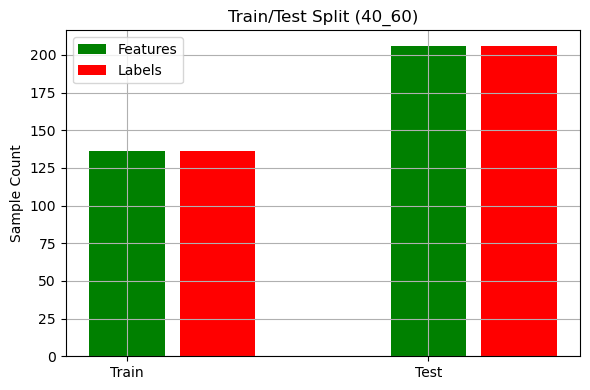

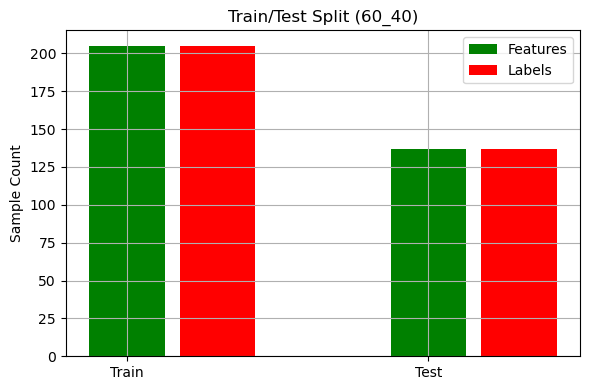

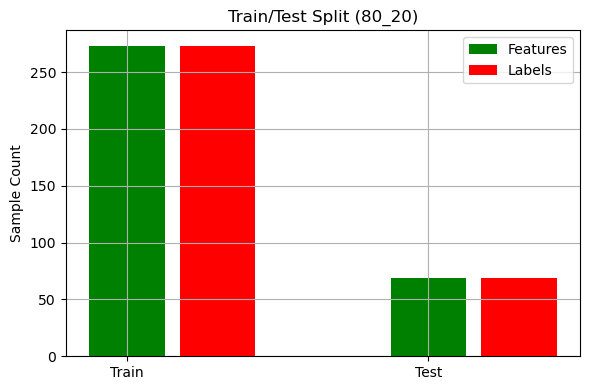

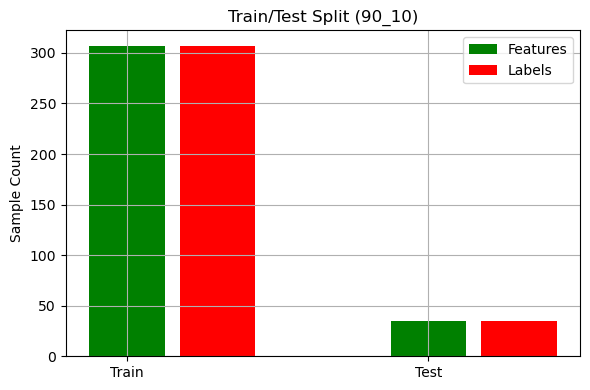

In [7]:
preparing_subset(cleaned_df)

visualise class distribution:

In [8]:

def visualize_class_distribution(labels, title="Class Distribution"):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=labels, palette="pastel", order=labels.value_counts().index)
    plt.title(title)
    plt.xlabel("Penguin Species")
    plt.ylabel("Sample Count")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [9]:
original_labels = cleaned_df["species"]

ratios = [(40, 60), (60, 40), (80, 20), (90, 10)]

labels = [original_labels]  # Include original dataset first
titles = ["Original Dataset"]

for train_pct, test_pct in ratios:
    label_test = pd.read_csv(f'prepared_subsets/label_test_{train_pct}_{test_pct}.csv')["species"]
    label_train = pd.read_csv(f'prepared_subsets/label_train_{train_pct}_{test_pct}.csv')["species"]

    labels.append(label_train)
    titles.append(f"Train Set ({train_pct}/{test_pct})")
    
    labels.append(label_test)
    titles.append(f"Test Set ({train_pct}/{test_pct})")



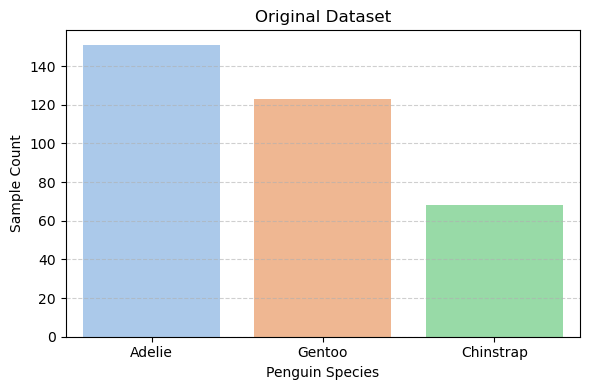

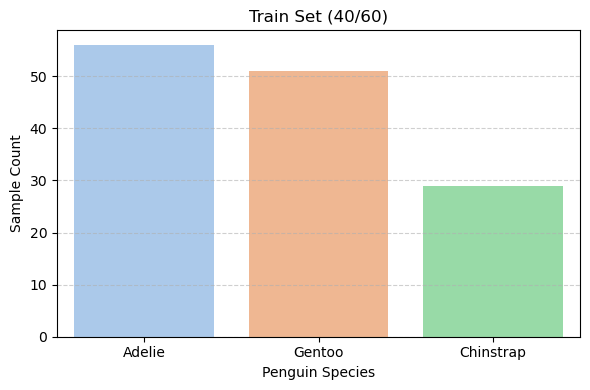

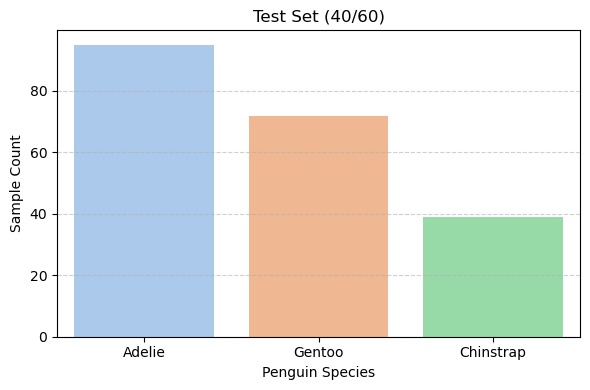

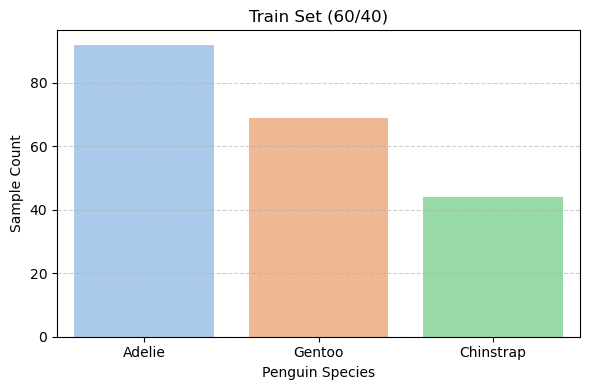

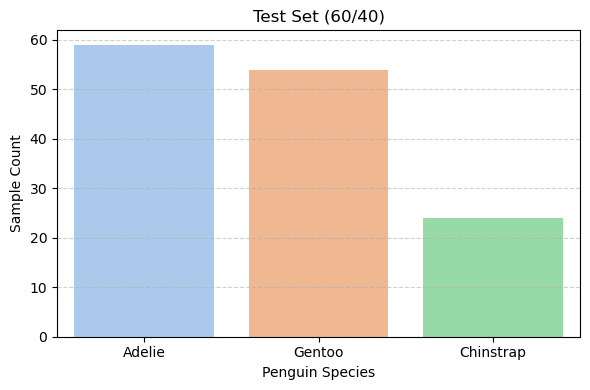

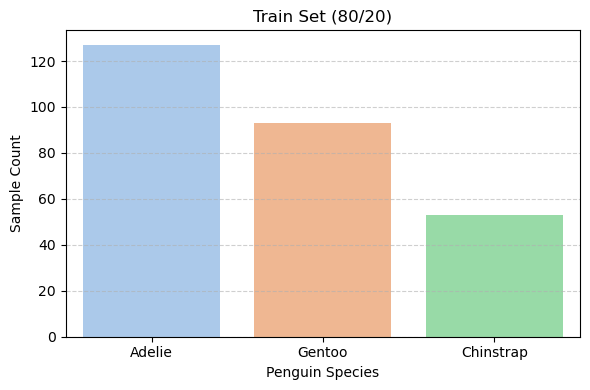

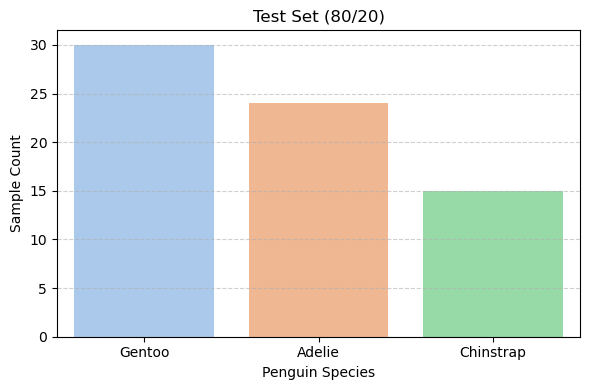

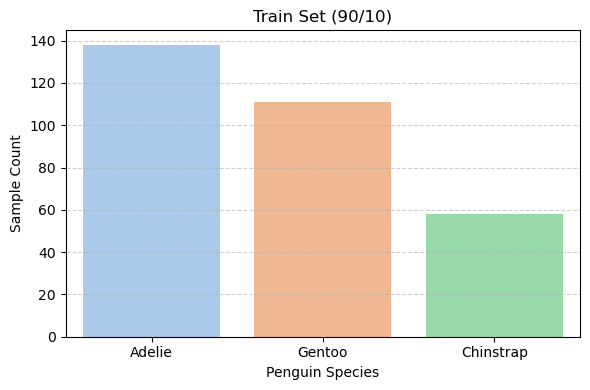

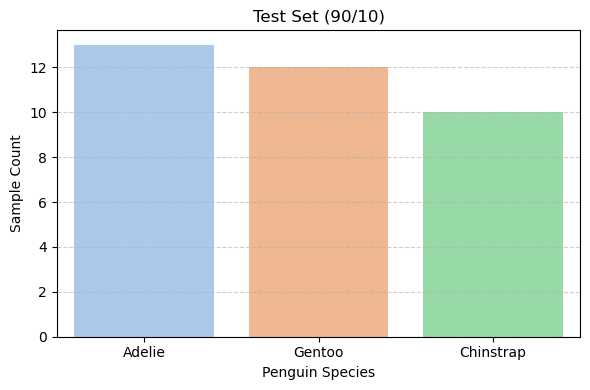

In [10]:
for i in range(len(labels)):
    visualize_class_distribution(labels[i], titles[i])